<h3>Customer Churn Prediction Model</h3>


In [47]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
# Importing the dataset

churn_df = pd.read_csv('churn_risk.csv')

In [49]:
# Getting a gist of the dataset

print(churn_df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [50]:
# Check for missing values

churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
# Filling missing values with the median (Numerical values only)

churn_df.fillna(churn_df.median(numeric_only=True), inplace=True)


In [52]:
churn_cols = churn_df.columns
print(churn_cols)




Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


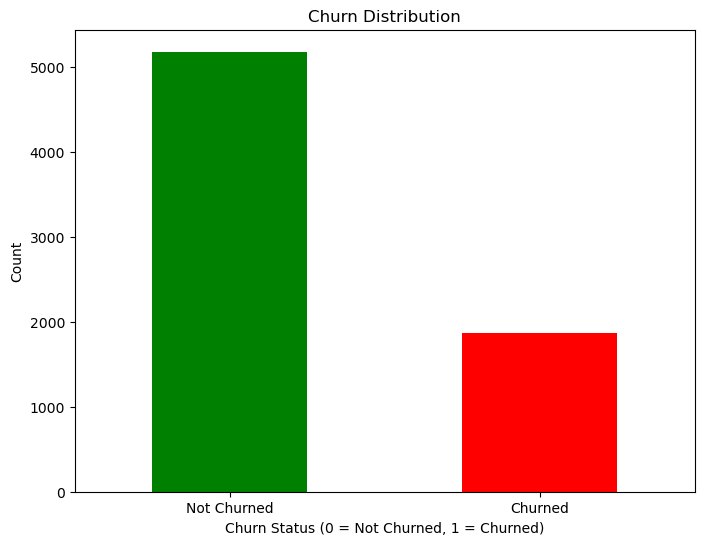

In [53]:
# Bar Plot for Churn Distribution

churn_counts = churn_df['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['green', 'red'], figsize=(8, 6))
plt.title('Churn Distribution')
plt.xlabel('Churn Status (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.show()


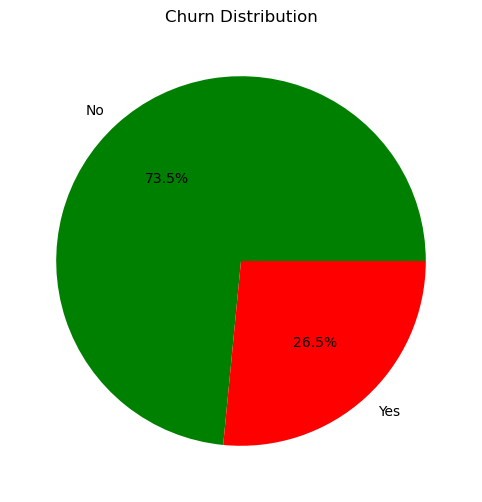

In [54]:
# Pie Chart for Churn Distribution

churn_counts = churn_df['Churn'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(8, 6))
plt.title('Churn Distribution')
plt.ylabel('')  # Remove y-label to make the chart cleaner
plt.show()


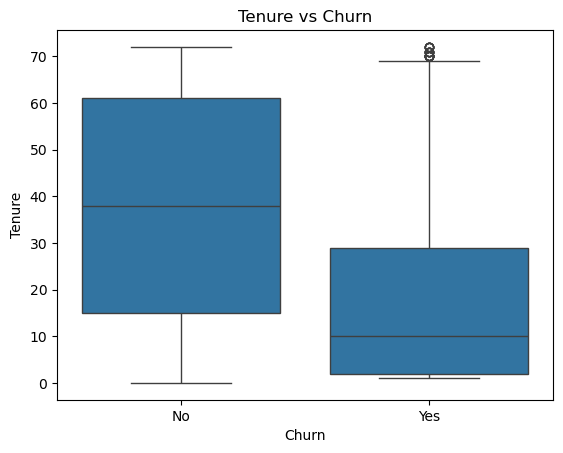

In [55]:
# Box Plot for Comparing Churned vs. Non-Churned (e.g., Age or Tenure)

sns.boxplot(x='Churn', y='tenure', data=churn_df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


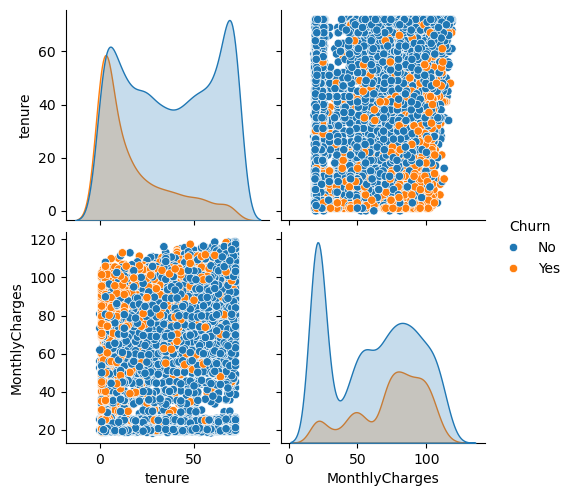

In [56]:
sns.pairplot(churn_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()


In [57]:
# Feature Selection - Features (X) and target (y)

X = churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Features like tenure, monthly charges, and total charges
y = churn_df['Churn']  # Target variable 'Churn' indicates if the customer has churned


In [58]:
# Convert 'TotalCharges' to numeric, coercing any non-numeric values to NaN
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Fill missing values for numeric columns with the median
numeric_cols = churn_df.select_dtypes(include=['number']).columns
churn_df[numeric_cols] = churn_df[numeric_cols].fillna(churn_df[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = churn_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    churn_df[col].fillna(churn_df[col].mode()[0], inplace=True)


C:\Users\91981\AppData\Local\Temp\ipykernel_2092\1289986919.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df[col].fillna(churn_df[col].mode()[0], inplace=True)


In [59]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
X = churn_df.drop(columns=['Churn', 'customerID'])  # Dropping 'Churn' and 'customerID'
y = churn_df['Churn']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Label Encoding -> Used to convert string into nums for model training

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply label encoding to categorical columns in both training and testing datasets
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Apply the same transformation to the test data


<h5>Model Selection</h5>

In [62]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Fit the model to the training data



RandomForestClassifier(random_state=42)

In [63]:
# Testing against data
y_pred = model.predict(X_test)
print(y_pred)

['Yes' 'No' 'No' ... 'No' 'No' 'Yes']


In [ ]:
# Evaluating the model

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))  # Prints precision, recall, f1-score
print(confusion_matrix(y_test, y_pred))  # Prints confusion matrix

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

[[945  91]
 [197 176]]


In [65]:
# Debugging: Used to remove persisting errors (If any)

print(X_train.isnull().sum())  # Check for NaN values
print(np.isfinite(X_train).all())  # Check for infinite values


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
gender              True
SeniorCitizen       True
Partner             True
Dependents          True
tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
TotalCharges        True
dtype: bool
